# Exploring US Births (1994-2003)

This data reads in data on daily births in the United States.  It processes it and then continues to look at additional statistics on birth rates by month, year etc.

In [4]:
f = open("US_births_1994-2003_CDC_NCHS.csv","r")
f1 = f.read()
f2 = f1.split("\n")
print(f2[0:10])

['year,month,date_of_month,day_of_week,births', '1994,1,1,6,8096', '1994,1,2,7,7772', '1994,1,3,1,10142', '1994,1,4,2,11248', '1994,1,5,3,11053', '1994,1,6,4,11406', '1994,1,7,5,11251', '1994,1,8,6,8653', '1994,1,9,7,7910']


In [5]:
def read_csv(file_string):
    f = open(file_string)
    f1 = f.read()
    string_list = f1.split("\n")
    new_string_list = string_list[1:len(string_list)]
    final_list = []
    for s in new_string_list:
        int_fields = []
        string_fields = s.split(",")
        for s2 in string_fields:
            int_fields.append(int(s2))
        final_list.append(int_fields)
    return(final_list)
cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
print(cdc_list[0:10])

[[1994, 1, 1, 6, 8096], [1994, 1, 2, 7, 7772], [1994, 1, 3, 1, 10142], [1994, 1, 4, 2, 11248], [1994, 1, 5, 3, 11053], [1994, 1, 6, 4, 11406], [1994, 1, 7, 5, 11251], [1994, 1, 8, 6, 8653], [1994, 1, 9, 7, 7910], [1994, 1, 10, 1, 10498]]


In [6]:
def month_births(text_list):
    births_per_month = {}
    for t in text_list:
        month = t[1]
        births = t[4]
        if month in births_per_month:
            births_per_month[month] = births_per_month[month] + births
        else:
            births_per_month[month] = births
    return(births_per_month)

cdc_month_births = month_births(cdc_list)
print(cdc_month_births)

{1: 3232517, 2: 3018140, 3: 3322069, 4: 3185314, 5: 3350907, 6: 3296530, 7: 3498783, 8: 3525858, 9: 3439698, 10: 3378814, 11: 3171647, 12: 3301860}


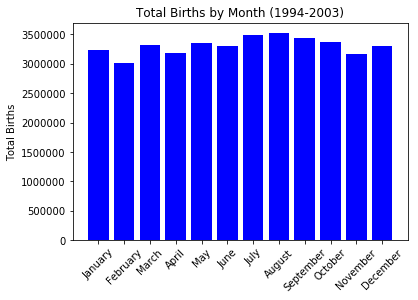

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_births = []
for i, val in cdc_month_births.items():
    month_births.append(val)

y_pos = np.arange(len(month_births))
plt.bar(y_pos, month_births, color="blue")
plt.xticks(y_pos, month_names, rotation=45)
plt.ylabel("Total Births")
plt.title("Total Births by Month (1994-2003)")
plt.show()

It appears that the highest birth months are during the summer months of July and August.  As the average pregnancy time is around 9 months this suggest that more babies get conceived during the September-October period.

In [6]:
#This function generates total births by day of week

def dow_births(text_list):
    births_per_day = {}
    for t in text_list:
        day = t[3]
        births = t[4]
        if day in births_per_day:
            births_per_day[day] = births_per_day[day] + births
        else:
            births_per_day[day] = births
    return(births_per_day)

cdc_day_births = dow_births(cdc_list)
print(cdc_day_births)

{1: 5789166, 2: 6446196, 3: 6322855, 4: 6288429, 5: 6233657, 6: 4562111, 7: 4079723}


In [10]:
#This function generalizes the previous functions so that it simply can calculate the total counts 
#by simply sending in the column that we want to compute the statistic on
def calc_counts(text_list, column):
    counts_column = {}
    for t in text_list:
        col = t[column]
        births = t[4]
        if col in counts_column:
            counts_column[col] = counts_column[col] + births
        else:
            counts_column[col] = births
    return(counts_column)

cdc_year_births = calc_counts(cdc_list,0)
print(cdc_year_births)

cdc_month_births = calc_counts(cdc_list,1)
print(cdc_month_births)

cdc_dom_births = calc_counts(cdc_list,2)
print(cdc_dom_births)

cdc_dow_births = calc_counts(cdc_list,3)
print(cdc_dow_births)

{1994: 3952767, 1995: 3899589, 1996: 3891494, 1997: 3880894, 1998: 3941553, 1999: 3959417, 2000: 4058814, 2001: 4025933, 2002: 4021726, 2003: 4089950}
{1: 3232517, 2: 3018140, 3: 3322069, 4: 3185314, 5: 3350907, 6: 3296530, 7: 3498783, 8: 3525858, 9: 3439698, 10: 3378814, 11: 3171647, 12: 3301860}
{1: 1276557, 2: 1288739, 3: 1304499, 4: 1288154, 5: 1299953, 6: 1304474, 7: 1310459, 8: 1312297, 9: 1303292, 10: 1320764, 11: 1314361, 12: 1318437, 13: 1277684, 14: 1320153, 15: 1319171, 16: 1315192, 17: 1324953, 18: 1326855, 19: 1318727, 20: 1324821, 21: 1322897, 22: 1317381, 23: 1293290, 24: 1288083, 25: 1272116, 26: 1284796, 27: 1294395, 28: 1307685, 29: 1223161, 30: 1202095, 31: 746696}
{6: 4562111, 7: 4079723, 1: 5789166, 2: 6446196, 3: 6322855, 4: 6288429, 5: 6233657}


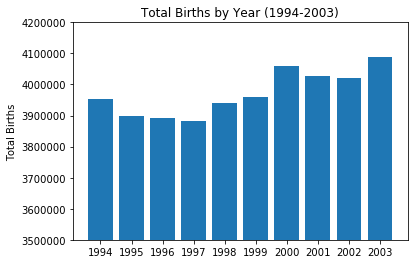

In [15]:
plt.bar(range(len(cdc_year_births)), cdc_year_births.values(), align='center')
plt.xticks(range(len(cdc_year_births)), cdc_year_births.keys())
plt.ylim((3500000,4200000))
plt.ylabel("Total Births")
plt.title("Total Births by Year (1994-2003)")
plt.show()

There is no constant trend in the births over the years.  However, both 2001 and 2003 respectively were high points in the number of births.  1994 was also higher than the subsequent 5 years.

In [17]:
#Calculates the min and max values for any dictionary that is given
#with the associated key

def min_max(dict_text):
    minval = min(dict_text)
    maxval = max(dict_text)
    min_max_val = [minval,maxval]
    return(min_max_val)
    
def min_max_key(dict_text):
    minkey = min(dict_text, key=dict_text.get)
    maxkey = max(dict_text, key=dict_text.get)
    minnum = dict_text[minkey]
    maxnum = dict_text[maxkey]
    min_max_num = []
    min_max_num.append([minkey,minnum])
    min_max_num.append([maxkey,maxnum])
    return(min_max_num)

min_max_year = min_max_key(cdc_year_births)
min_max_month = min_max_key(cdc_month_births)
print(min_max_year)
print(min_max_month)

min_max_yr = min_max(cdc_year_births)
print(min_max_yr)

[[1997, 3880894], [2003, 4089950]]
[[2, 3018140], [8, 3525858]]
[1994, 2003]


In [18]:
#use function that calculates difference between consecutive values 
#to show if number of births is increasing or decrease.
#e.g. calculating how the number of births on saturday change each
#year between 1994 and 2003

def calc_counts2(text_list, column1, column2):
    counts_column = {}
    for t in text_list:
        col1 = t[column1]
        col2 = t[column2]
        births = t[4]
        if col1 in counts_column and col2 in counts_column:
            counts_column[col1,col2] = counts_column[col1,col2] + births
        else:
            counts_column[col1,col2] = births
    return(counts_column)

cdc_year_dow_births = calc_counts2(cdc_list, 0, 3)
print(cdc_year_dow_births)


{(1994, 6): 8809, (1994, 7): 7192, (1994, 1): 8454, (1994, 2): 11131, (1994, 3): 12398, (1994, 4): 12189, (1994, 5): 12051, (1995, 7): 7596, (1995, 1): 7027, (1995, 2): 9447, (1995, 3): 11897, (1995, 4): 12530, (1995, 5): 12207, (1995, 6): 9093, (1996, 1): 11911, (1996, 2): 11924, (1996, 3): 7092, (1996, 4): 10321, (1996, 5): 12260, (1996, 6): 9103, (1996, 7): 8193, (1997, 3): 11818, (1997, 4): 7055, (1997, 5): 10075, (1997, 6): 8679, (1997, 7): 7864, (1997, 1): 12206, (1997, 2): 13521, (1998, 4): 11389, (1998, 5): 7020, (1998, 6): 7735, (1998, 7): 7829, (1998, 1): 11980, (1998, 2): 13637, (1998, 3): 13297, (1999, 5): 9335, (1999, 6): 6674, (1999, 7): 7432, (1999, 1): 11579, (1999, 2): 13158, (1999, 3): 12629, (1999, 4): 11935, (2000, 6): 9177, (2000, 7): 7721, (2000, 1): 6566, (2000, 2): 10070, (2000, 3): 12858, (2000, 4): 13532, (2000, 5): 13234, (2001, 1): 10018, (2001, 2): 6443, (2001, 3): 10735, (2001, 4): 13762, (2001, 5): 13918, (2001, 6): 9365, (2001, 7): 7679, (2002, 2): 12339

In [19]:
#dict_text takes a dictionary with two keys year and day and 
#calculates trend between the years
def calc_trend(dict_text,minval,maxval,day):
    trend = {}
    for i in range(minval, maxval):
        print(i)
        trend[i+1] = dict_text[i+1, day] - dict_text[i, day]
    return(trend)

min_max_yr = min_max(cdc_year_births)
minyr = min_max_yr[0]
maxyr = min_max_yr[1]
trendyrs = calc_trend(cdc_year_dow_births, minyr, maxyr, 5)
print(trendyrs)

1994
1995
1996
1997
1998
1999
2000
2001
2002
{1995: 156, 1996: 53, 1997: -2185, 1998: -3055, 1999: 2315, 2000: 3899, 2001: 684, 2002: -586, 2003: -3114}


In [20]:
#combine the two datasets together note that some years overlap 
#need to eliminate these years

#read in new dataset which has similar columns as the CDC dataset
cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
ssa_list = read_csv("US_births_2000-2014_SSA.csv")
years_cdc = []
years_ssa = []
for c in cdc_list:
    if c[0] not in years_cdc:
        years_cdc.append(c[0])
for s in ssa_list:
    if s[0] not in years_cdc:
        if s[0] not in years_ssa: 
            years_ssa.append(s[0])
print(years_cdc)
print(years_ssa)
        

[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


In [21]:
#now that we have the dates of non-overlap re-save the years and merge
#them together

def newlist(textlist1, yearlist1, textlist2, yearlist2):
    newtextlist = []
    for t1 in textlist1:
        if t1[0] in yearlist1:
            newtextlist.append(t1)
    for t2 in textlist2:
        if t2[0] in yearlist2:
            newtextlist.append(t2)
    return(newtextlist)

full_list_new = newlist(cdc_list, years_cdc, ssa_list, years_ssa)
print(full_list_new[1:10])


[[1994, 1, 2, 7, 7772], [1994, 1, 3, 1, 10142], [1994, 1, 4, 2, 11248], [1994, 1, 5, 3, 11053], [1994, 1, 6, 4, 11406], [1994, 1, 7, 5, 11251], [1994, 1, 8, 6, 8653], [1994, 1, 9, 7, 7910], [1994, 1, 10, 1, 10498]]


In [27]:
# We can perform some of the earlier analysis on this data.  However, lets get average for some 
#variables instead rather than totals.

def calc_average(text_list, column):
    counts_column = {}
    num_value = {}
    for t in text_list:
        col = t[column]
        births = t[4]
        if col in counts_column:
            counts_column[col] = counts_column[col] + births
            num_value[col]+=1
        else:
            counts_column[col] = births
            num_value[col]=1
    for key,val in counts_column.items():
        counts_column[key] = round(val/num_value[key],2)
    return(counts_column)

tot_all_year_births = calc_counts(full_list_new,0)
print(tot_all_year_births)

avg_all_month_births = calc_average(full_list_new,1)
print(avg_all_month_births)

avg_all_dow_births = calc_average(full_list_new,3)
print(avg_all_dow_births)

{1994: 3952767, 1995: 3899589, 1996: 3891494, 1997: 3880894, 1998: 3941553, 1999: 3959417, 2000: 4058814, 2001: 4025933, 2002: 4021726, 2003: 4089950, 2004: 4186863, 2005: 4211941, 2006: 4335154, 2007: 4380784, 2008: 4310737, 2009: 4190991, 2010: 4055975, 2011: 4006908, 2012: 4000868, 2013: 3973337, 2014: 4010532}
{1: 10677.96, 2: 10939.75, 3: 10940.0, 4: 10836.26, 5: 10983.94, 6: 11266.78, 7: 11521.96, 8: 11668.08, 9: 11763.97, 10: 11158.35, 11: 10880.73, 12: 10942.01}
{6: 8592.76, 7: 7610.33, 1: 11562.58, 2: 12787.73, 3: 12568.71, 4: 12503.46, 5: 12304.2}


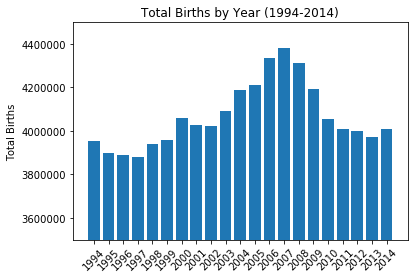

In [33]:
plt.bar(range(len(tot_all_year_births)), tot_all_year_births.values(), align='center')
plt.xticks(range(len(tot_all_year_births)), tot_all_year_births.keys(), rotation=45)
plt.ylim((3500000,4500000))
plt.ylabel("Total Births")
plt.title("Total Births by Year (1994-2014)")
plt.show()

Average Births By Day of Week: [(1, 11562.58), (2, 12787.73), (3, 12568.71), (4, 12503.46), (5, 12304.2), (6, 8592.76), (7, 7610.33)]


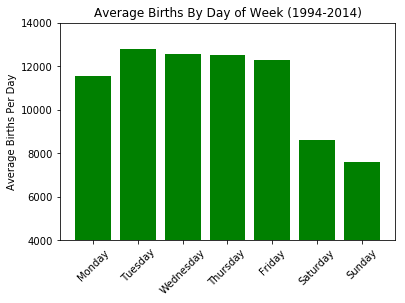

In [36]:
import operator

sorted_day_of_week_avg_births = sorted(avg_all_dow_births.items(), key=operator.itemgetter(0))
print("Average Births By Day of Week: {}".format(sorted_day_of_week_avg_births))

day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
births = []
for i in sorted_day_of_week_avg_births:
    births.append(i[1])

y_pos = np.arange(len(births))
plt.bar(y_pos, births, color="green")
plt.xticks(y_pos, day_names, rotation=45)
plt.ylabel("Average Births Per Day")
plt.title("Average Births By Day of Week (1994-2014)")
plt.ylim((4000,14000))
plt.show()